# Project: Analyze No-Show Appointments data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset selected for this project is based on the 100,000 medical appointments in Brazil. We will be using this dataset to determine if there are any meaningful way to predict if a patient would be a no-show for their appointment. The dataset contain patient information such as age, gender, medical history, appointment information such as appointment dates, location, if sms reminder was used, financial information in if assistant was received (as indicated on the scholarship column), and the final outcome of the show/no-show.


### Question(s) for Analysis
- Does a patient handicap prevent them from making the appointments?
- Does SMS reminder prevent no shows?
- Can we predict likelihood of no show base on the patient's residence?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# only run once #!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Displaying sample dataset and basic metadata about the dataset

In [3]:
# loading csv
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [4]:
# preview sample data to confirm csv has been loaded
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# getting basic column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# changeing the column name of No-show to No_show
df.rename(columns={"No-show": "No_show"}, inplace=True)

In [7]:
# change the ScheduledDay and AppointmentDay to datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [9]:
# size of the dataset
df.shape

(110527, 14)

This dataset contains 110,527 records with 14 fields. There are no null values in any columns.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we can get a general feel of the dataset. We can see that there is incorrect data in the minimum age. On scholarship, hipertension, diabetes, alcoholism, SMS_received columns, we are using 1/0 to represent True/False in the dataset. The max value on the Handcap column is 4, which seems to indicate the number of hanicap a patient might have.


### Data Cleaning
- Remove outlying data base on age
- Remove columns that will not be used in the data analysis
 

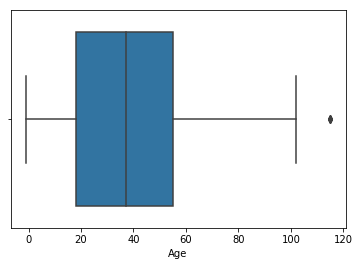

In [11]:
# locate the age outliers
sns.boxplot(df.Age)
plt.show()


Besides the negative age, by using the box plot, we can see that there are also outliers where the age is greater than 100

In [12]:
#remove the outliers
df = df[(df.Age > -1) & (df.Age <= 100)]

In [13]:
# Remove columns not used in data analysis
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

Patient Id and Appointment Id also would not be meaningful in providing a prediction. We will be dopping those two columns from the dataset

In [14]:
# confirm PatientId and AppointmentID columns are dropped
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

First, plot the proportion about no shows for all records

In [15]:
# declare group of no-show and show-up data for later use
noShow = df[df['No_show'] == 'Yes']
showUp = df[df['No_show'] == 'No']

In [16]:
#convert noshow column to a count table, to be used for the pie chart plot
noshow_count = df['No_show'].value_counts()
print(noshow_count)

No     88203
Yes    22316
Name: No_show, dtype: int64


Converting the No-show column to count, we can see that there are 22316 that were no-show, and 88203 where the appointment took place.

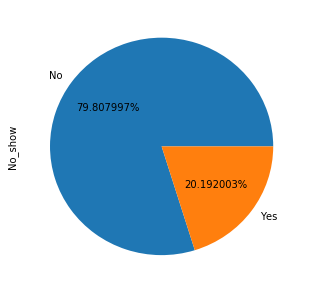

In [17]:
noshow_count.plot.pie(figsize=(5,5), autopct='%2f%%')
plt.show()

By plotting the pie chart, we can see the no-show comprise about 20.19% of all appointments made.

In [18]:
# setting the title, xLabel, and yLabel to plot
def setPlotTitle(strTitle, strXLabel, strYLabel):
    plt.title(strTitle)
    plt.xlabel(strXLabel)
    plt.ylabel(strYLabel);


### Question 1: Does a patient handicap prevent them from making the appointments?

To answer this, we will plot with the subset of data of patient with handicap versus without.

In [19]:
# Bin hancap column with 0 (no handicap) in one group, and handcap > 0 (has any handicap) in the other
noHandcap = df['Handcap'] == 0
hasHandcap = df['Handcap'] != 0

In [20]:
# verify handcap bucket
df[noHandcap].head(10)
df[hasHandcap].head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
147,F,2016-04-29 08:48:03,2016-04-29,65,UNIVERSITÁRIO,0,1,0,0,1,0,No
189,F,2016-04-29 10:56:26,2016-04-29,77,CONQUISTA,0,1,0,0,1,0,No
190,M,2016-04-29 10:56:40,2016-04-29,81,CONQUISTA,0,0,0,0,1,0,No
199,M,2016-04-29 09:54:38,2016-04-29,62,PARQUE MOSCOSO,0,1,1,0,1,0,No
211,F,2016-04-27 18:03:02,2016-04-29,56,MARUÍPE,0,1,0,0,1,0,No
238,F,2016-04-26 13:06:57,2016-04-29,65,ARIOVALDO FAVALESSA,0,1,1,0,1,1,No
272,F,2016-04-18 10:12:57,2016-04-29,51,NOVA PALESTINA,0,1,0,0,1,1,Yes
518,M,2016-04-29 11:46:28,2016-04-29,79,BONFIM,0,1,1,0,1,0,No
622,M,2016-04-28 10:25:55,2016-04-29,47,ENSEADA DO SUÁ,0,0,0,0,1,0,No
661,M,2016-04-29 13:27:49,2016-04-29,59,SANTO ANDRÉ,0,1,1,0,1,0,No


In [21]:
print('No Handicap - No Show count')
handcapNoShowCount = df[hasHandcap]['No_show'].value_counts(normalize = True)
print(handcapNoShowCount)
print('Any Handicap - No Show Count')
noHandcapNoShowCount = df[noHandcap]['No_show'].value_counts(normalize = True)
print(noHandcapNoShowCount)

No Handicap - No Show count
No     0.819401
Yes    0.180599
Name: No_show, dtype: float64
Any Handicap - No Show Count
No     0.797639
Yes    0.202361
Name: No_show, dtype: float64


In [22]:
dfHandcapGroup = df.groupby([noHandcap]).No_show.value_counts(normalize = True).unstack()
print(dfHandcapGroup)

No_show        No       Yes
Handcap                    
False    0.819401  0.180599
True     0.797639  0.202361


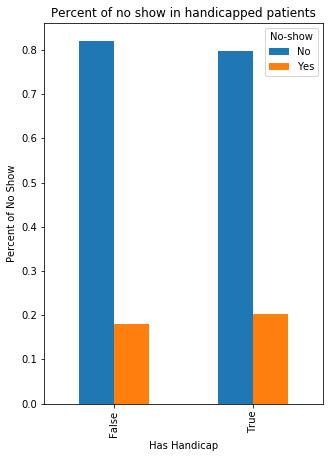

In [23]:
dfHandcapGroup.plot(kind='bar', figsize=(5,7))
plt.legend(title='No-show')

setPlotTitle('Percent of no show in handicapped patients', 'Has Handicap', 'Percent of No Show')

For population with handicap, there are 20.24% that were no shows, for population without handicap, there are 18.06% that were no shows. This shows a slightly correlation that having a handicap might increase the chance of a patient being no shows.

### Does SMS reminder prevent no shows

In [24]:
df.SMS_received.replace((1, 0), ('Yes', 'No'), inplace = True)
dfSMSGroup = df.groupby(['SMS_received']).No_show.value_counts(normalize = True).unstack()
print(dfSMSGroup)

No_show             No       Yes
SMS_received                    
No            0.832991  0.167009
Yes           0.724247  0.275753


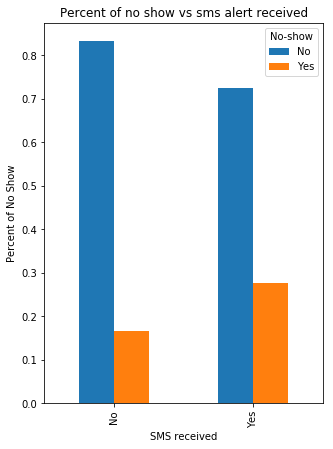

In [25]:
dfSMSGroup.plot(kind='bar', figsize=(5,7))
plt.legend(title='No-show')

setPlotTitle('Percent of no show vs sms alert received', 'SMS received', 'Percent of No Show')

Contrary to expectation, SMS reminders did not decrease to likelihood of no shows

### Can we predict likelihood of no show base on the patient's residence?

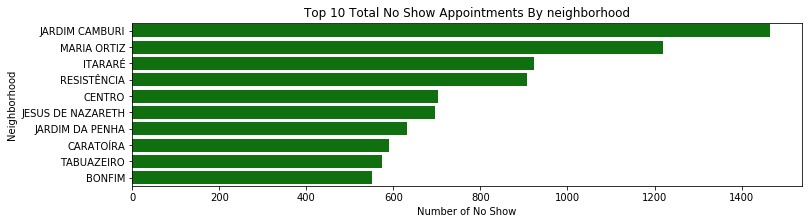

In [26]:
# plot number of no show against the neighborhood
plt.figure(figsize = [12, 3])
neighNoShowCount = noShow['Neighbourhood'].value_counts().index[:10]
sns.countplot(data = noShow, y = noShow['Neighbourhood'], color = 'green', order = neighNoShowCount)
setPlotTitle('Top 10 Total No Show Appointments By neighborhood', 'Number of No Show', 'Neighborhood')

The Jardim Camburi neighborhood has a much higher no show incident count.

<a id='conclusions'></a>
## Conclusions

In conslusions, the dataset above has shown that there are a slight increase in no show when the patient has 1 or more handicap. In the summary table, it has accounted 20.24% of the patients with handicapped were no shows, versus 18.06% od patients were no shows. This shows a slightly correlation that having a handicap might increase the chance of a patient being no shows.

In [27]:
print('No Handicap - No Show count')
handcapNoShowCount = df[hasHandcap]['No_show'].value_counts(normalize = True)
print(handcapNoShowCount)
print('Any Handicap - No Show Count')
noHandcapNoShowCount = df[noHandcap]['No_show'].value_counts(normalize = True)
print(noHandcapNoShowCount)

No Handicap - No Show count
No     0.819401
Yes    0.180599
Name: No_show, dtype: float64
Any Handicap - No Show Count
No     0.797639
Yes    0.202361
Name: No_show, dtype: float64


Interestingly enough, a SMS reminder does not seems to prevent no show. There are 27.6% of patients receiving a SMS reminder that were no show, versus only 16.7% of patients who did not received a SMS reminder. However, it was not mention on the dataset that when the SMS reminder was sent out. More investigation is needed to see if SMS is in fact no effective, or if it was the execution, ot the timing of the SMS message that makes it ineffective.

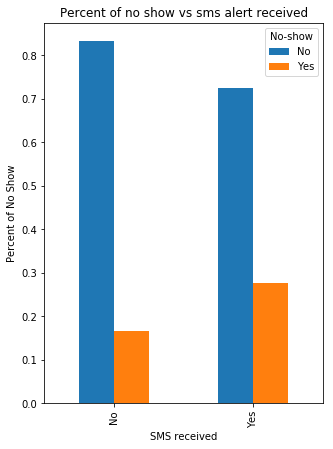

In [28]:
dfSMSGroup.plot(kind='bar', figsize=(5,7))
plt.legend(title='No-show')

setPlotTitle('Percent of no show vs sms alert received', 'SMS received', 'Percent of No Show')

Lastly, we have learnt that the Jardim Camburi neighborhood has a much higher no show incident count, which has 200+ more incidents of no show compare to the Maria Ortiz, the next neighborhood in the ranking. We could be adding an google map api to the investigation to see it was the distance from the neighborhood has an effect to the no show. This can also be affected by the neighborhood social economic population, or if adequate transportation are in place for the Jardim Camburi neighborhood.

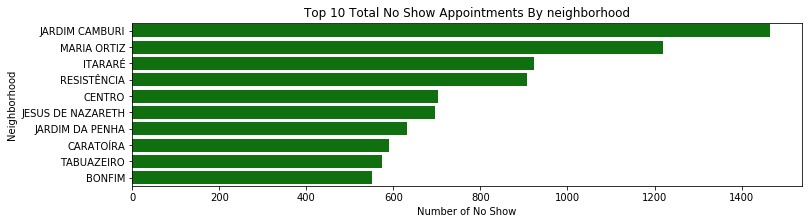

In [29]:
# plot number of no show against the neighborhood
plt.figure(figsize = [12, 3])
neighNoShowCount = noShow['Neighbourhood'].value_counts().index[:10]
sns.countplot(data = noShow, y = noShow['Neighbourhood'], color = 'green', order = neighNoShowCount)
setPlotTitle('Top 10 Total No Show Appointments By neighborhood', 'Number of No Show', 'Neighborhood')

### Limitation
This is a fairly old and limited dataset. It would be best we can collect a larger sample over a longer period of time before making predection. It will also be helpful to acquire data from other hospitals to validation the trend and predictions. At the time, each record could use some extra information, such as time of day of the appointment, mode of transportation, employment status, etc. There was also blank and in correct information from the original set of data, so the method of data collection should be re-evaluated to ensure the data collected are correct and useful.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0